Ejercicio Mapas 

In [1]:
import os
cwd = os.getcwd()
print(cwd)

C:\Users\DELL\Downloads\PUCP\2023-2\TALLER HERR CUANTI\TAREA_MAPAS


In [2]:
import geopandas as gpd

In [12]:
import matplotlib.pyplot as plt

In [24]:
import mapclassify 
import numpy as np

In [25]:
import glob
import pandas as pd

In [3]:
departamentos=gpd.read_file(os.path.join("INFO_CARTOGRAFICA","LIMITE_DEPARTAMENTO","LIMITE_DEP.shp"))

In [4]:
type(departamentos)

geopandas.geodataframe.GeoDataFrame

In [5]:
departamentos.shape

(25, 6)

In [6]:
departamentos.columns

Index(['OBJECTID', 'CCDD', 'NOMBDEP', 'Shape_Leng', 'Shape_Area', 'geometry'], dtype='object')

In [7]:
departamentos.head()

OBJECTID CCDD   NOMBDEP  Shape_Leng  Shape_Area  \
0         1   01  AMAZONAS   12.912088    3.203006   
1         2   02    ANCASH   11.771520    2.954605   
2         3   03  APURIMAC    7.730154    1.765933   
3         4   04  AREQUIPA   17.429625    5.330203   
4         5   05  AYACUCHO   17.127166    3.643705   

                                            geometry  
0  POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...  
1  POLYGON ((-77.64697 -8.05086, -77.64689 -8.051...  
2  POLYGON ((-73.74655 -13.17442, -73.74570 -13.1...  
3  POLYGON ((-71.98109 -14.64062, -71.98093 -14.6...  
4  POLYGON ((-74.34843 -12.17503, -74.35000 -12.1...

In [8]:
print(departamentos)

    OBJECTID CCDD        NOMBDEP  Shape_Leng  Shape_Area  \
0          1   01       AMAZONAS   12.912088    3.203006   
1          2   02         ANCASH   11.771520    2.954605   
2          3   03       APURIMAC    7.730154    1.765933   
3          4   04       AREQUIPA   17.429625    5.330203   
4          5   05       AYACUCHO   17.127166    3.643705   
5          6   06      CAJAMARCA   12.399239    2.684527   
6          7   07         CALLAO    1.131635    0.011740   
7          8   08          CUSCO   21.794434    6.000331   
8          9   09   HUANCAVELICA    9.561245    1.839851   
9         10   10        HUANUCO   14.589840    3.089811   
10        11   11            ICA   10.387016    1.767037   
11        12   12          JUNIN   14.314727    3.658881   
12        13   13    LA LIBERTAD   13.141385    2.068767   
13        14   14     LAMBAYEQUE    6.687039    1.184994   
14        15   15           LIMA   12.767353    2.904519   
15        16   16         LORETO   46.70

In [9]:
departamentos[departamentos.isna().any(axis=1)]
# types
departamentos.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    25 non-null     int64   
 1   CCDD        25 non-null     object  
 2   NOMBDEP     25 non-null     object  
 3   Shape_Leng  25 non-null     float64 
 4   Shape_Area  25 non-null     float64 
 5   geometry    25 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 1.3+ KB


In [13]:
departamentos.plot(facecolor="gainsboro",#color of polygon fill
               edgecolor='black', #color of lines
               linewidth=0.1,
               figsize=(8,8)) #thickness of lines
plt.savefig(os.path.join("images",'peru_dep.jpg'))

In [14]:
provincias=gpd.read_file(os.path.join("INFO_CARTOGRAFICA","LIMITE_PROVINCIA","LIMITE_PROV.shp"))
distritos=gpd.read_file(os.path.join("INFO_CARTOGRAFICA","LIMITE_DISTRITO","LIMITE_DIST.shp"))

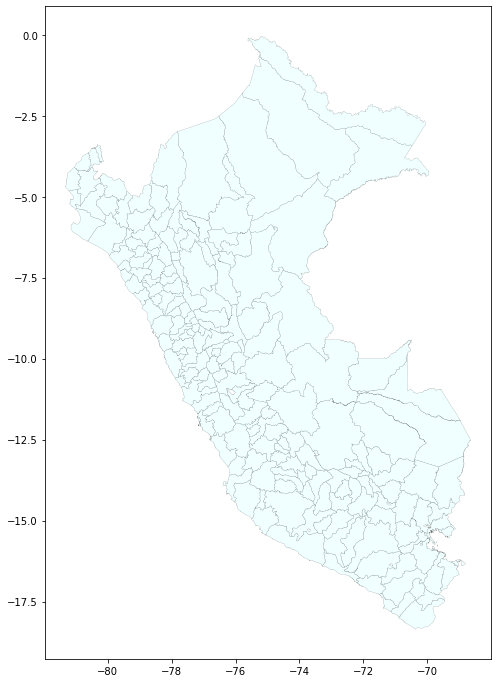

In [17]:
provincias.plot(facecolor="azure",#color of polygon fill
               edgecolor='black', #color of lines
               linewidth=0.1,
               figsize=(12,12)) #thickness of lines
plt.savefig(os.path.join("images",'peru_prov.jpg'))

In [20]:
distritos.plot(facecolor="azure",#color of polygon fill
               edgecolor='black', #color of lines
               linewidth=0.1,
               figsize=(20,20)) #thickness of lines
plt.savefig(os.path.join("images",'peru_dist.jpg'))

In [21]:
distritos.head()

OBJECTID_1 CCDD NOMBDEP CCPP NOMBPROV CCDI             NOMBDIST  UBIGEO  \
0           1   15    LIMA   01     LIMA   38  SANTA MARIA DEL MAR  150138   
1           2   15    LIMA   05   CAÑETE   05               CHILCA  150505   
2           3   15    LIMA   01     LIMA   19                LURIN  150119   
3           4   15    LIMA   01     LIMA   24             PUCUSANA  150124   
4           5   15    LIMA   01     LIMA   26        PUNTA HERMOSA  150126   

  IDPROV  Shape_STAr  Shape_STLe  Shape_Leng  Shape_Area  \
0   1501    0.000649    0.156101    0.156101    0.000649   
1   1505    0.040063    1.154549    1.154549    0.040063   
2   1501    0.015603    0.825145    0.820880    0.015595   
3   1501    0.002562    0.437869    0.437869    0.002562   
4   1501    0.010145    0.607714    0.607714    0.010145   

                                            geometry  
0  MULTIPOLYGON (((-76.78182 -12.40919, -76.78173...  
1  POLYGON ((-76.55171 -12.28024, -76.55021 -12.2...  
2  MULTIPOLYGON (((-76.70549 -12.17672, -76.70429...  
3  MULTIPOLYGON (((-76.77367 -12.42553, -76.77332...  
4  MULTIPOLYGON (((-76.65645 -12.18799, -76.65559...

In [22]:
lima=distritos[distritos.NOMBDEP=='LIMA']

In [23]:
lima

OBJECTID_1 CCDD NOMBDEP CCPP   NOMBPROV CCDI             NOMBDIST  \
0              1   15    LIMA   01       LIMA   38  SANTA MARIA DEL MAR   
1              2   15    LIMA   05     CAÑETE   05               CHILCA   
2              3   15    LIMA   01       LIMA   19                LURIN   
3              4   15    LIMA   01       LIMA   24             PUCUSANA   
4              5   15    LIMA   01       LIMA   26        PUNTA HERMOSA   
...          ...  ...     ...  ...        ...  ...                  ...   
1314        1315   15    LIMA   02   BARRANCA   03            PATIVILCA   
1315        1316   15    LIMA   03  CAJATAMBO   01            CAJATAMBO   
1316        1317   15    LIMA   03  CAJATAMBO   02                 COPA   
1317        1318   15    LIMA   03  CAJATAMBO   03               GORGOR   
1318        1319   15    LIMA   01       LIMA   01                 LIMA   

      UBIGEO IDPROV  Shape_STAr  Shape_STLe  Shape_Leng  Shape_Area  \
0     150138   1501    0.000649    0.156101    0.156101    0.000649   
1     150505   1505    0.040063    1.154549    1.154549    0.040063   
2     150119   1501    0.015603    0.825145    0.820880    0.015595   
3     150124   1501    0.002562    0.437869    0.437869    0.002562   
4     150126   1501    0.010145    0.607714    0.607714    0.010145   
...      ...    ...         ...         ...         ...         ...   
1314  150203   1502    0.023286    0.997149    0.997149    0.023286   
1315  150301   1503    0.045600    1.181746    1.181746    0.045600   
1316  150302   1503    0.016956    0.876564    0.876564    0.016956   
1317  150303   1503    0.027770    0.830029    0.830029    0.027770   
1318  150101   1501    0.001792    0.360656    0.360656    0.001792   

                                               geometry  
0     MULTIPOLYGON (((-76.78182 -12.40919, -76.78173...  
1     POLYGON ((-76.55171 -12.28024, -76.55021 -12.2...  
2     MULTIPOLYGON (((-76.70549 -12.17672, -76.70429...  
3     MULTIPOLYGON (((-76.77367 -12.42553, -76.77332...  
4     MULTIPOLYGON (((-76.65645 -12.18799, -76.65559...  
...                                                 ...  
1314  POLYGON ((-77.62330 -10.50233, -77.62225 -10.5...  
1315  POLYGON ((-76.89389 -10.30486, -76.89334 -10.3...  
1316  POLYGON ((-76.90622 -10.27488, -76.90610 -10.2...  
1317  POLYGON ((-77.04053 -10.54263, -77.03665 -10.5...  
1318  POLYGON ((-77.08303 -12.03632, -77.08299 -12.0...  

[171 rows x 14 columns]

In [83]:
lima.plot(facecolor="azure",#color of polygon fill
               edgecolor='black', #color of lines
               linewidth=0.1,
               figsize=(20,20)) #thickness of lines

<AxesSubplot:>

Importar indices

In [26]:
indexDep = pd.read_stata(os.path.join("Data","datos_departamental.dta"))  

In [27]:
indexDep

CCDD    vgen_1    vgen_2     prost
0   02  0.097534  0.120207  0.149960
1   04  0.244882  0.301743  0.192490
2   07  0.120211  0.145258  0.130145
3   11  0.131980  0.116530  0.233768
4   13  0.197792  0.226585  0.200892
5   14  0.141450  0.145194  0.192073
6   15  0.155482  0.157804  0.161020
7   20  0.161268  0.168477  0.227237
8   24  0.142245  0.075704  0.185065

In [28]:
indexDist = pd.read_stata(os.path.join("Data","datosLimaDistrital.dta"))  

In [29]:
indexDist

CCDI    vgen_1    vgen_2     prost
0    01  0.128975  0.133701  0.127041
1    02  0.072361  0.077106  0.182088
2    03  0.143194  0.180280  0.198381
3    04  0.090763  0.218900  0.042712
4    05  0.043956  0.031968  0.073926
5    06  0.043750  0.067969  0.182031
6    07  0.384000  0.376000  0.256000
7    08  0.132102  0.111223  0.070869
8    10  0.203801  0.228933  0.226822
9    11  0.082237  0.074927  0.152778
10   12  0.178072  0.277410  0.158205
11   13  0.486957  0.478261  0.173913
12   14  0.160000  0.320000  0.120000
13   15  0.138767  0.088106  0.123348
14   16  0.168675  0.289157  0.132530
15   17  0.325068  0.321798  0.277384
16   18  0.000000  0.000000  0.000000
17   19  0.107477  0.074766  0.070093
18   20  0.180556  0.083333  0.048611
19   22  0.115942  0.057971  0.057971
20   25  0.263889  0.256944  0.177083
21   26  0.153846  0.423077  0.076923
22   27  0.400000  0.800000  0.000000
23   28  0.176871  0.176871  0.193878
24   30  0.369748  0.369748  0.084034
25   32  0.107461  0.105315  0.154176
26   33  0.075712  0.077961  0.086582
27   34  0.063584  0.075145  0.069364
28   35  0.184609  0.205875  0.292929
29   36  0.271153  0.239485  0.185552
30   37  0.199136  0.075816  0.267274
31   40  0.101999  0.155447  0.084863
32   41  0.174545  0.116364  0.109091
33   42  0.068542  0.037827  0.050436
34   43  0.181020  0.194618  0.137960

In [30]:
indexDep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CCDD    9 non-null      object 
 1   vgen_1  9 non-null      float32
 2   vgen_2  9 non-null      float32
 3   prost   9 non-null      float32
dtypes: float32(3), object(1)
memory usage: 252.0+ bytes


In [31]:
indexDist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CCDI    35 non-null     object 
 1   vgen_1  35 non-null     float32
 2   vgen_2  35 non-null     float32
 3   prost   35 non-null     float32
dtypes: float32(3), object(1)
memory usage: 980.0+ bytes


In [46]:
mergDep1 = departamentos.merge(indexDep,how='left',left_on='CCDD',right_on='CCDD') #keep missing values

In [47]:
type(mergDep1)

geopandas.geodataframe.GeoDataFrame

In [49]:
mergDep1

OBJECTID CCDD        NOMBDEP  Shape_Leng  Shape_Area  \
0          1   01       AMAZONAS   12.912088    3.203006   
1          2   02         ANCASH   11.771520    2.954605   
2          3   03       APURIMAC    7.730154    1.765933   
3          4   04       AREQUIPA   17.429625    5.330203   
4          5   05       AYACUCHO   17.127166    3.643705   
5          6   06      CAJAMARCA   12.399239    2.684527   
6          7   07         CALLAO    1.131635    0.011740   
7          8   08          CUSCO   21.794434    6.000331   
8          9   09   HUANCAVELICA    9.561245    1.839851   
9         10   10        HUANUCO   14.589840    3.089811   
10        11   11            ICA   10.387016    1.767037   
11        12   12          JUNIN   14.314727    3.658881   
12        13   13    LA LIBERTAD   13.141385    2.068767   
13        14   14     LAMBAYEQUE    6.687039    1.184994   
14        15   15           LIMA   12.767353    2.904519   
15        16   16         LORETO   46.701789   30.550256   
16        17   17  MADRE DE DIOS   15.416397    7.023854   
17        18   18       MOQUEGUA    7.719946    1.334898   
18        19   19          PASCO   10.891698    1.972864   
19        20   20          PIURA   11.334192    2.899203   
20        21   21           PUNO   26.729499    5.666684   
21        22   22     SAN MARTIN   16.162954    4.174664   
22        23   23          TACNA    6.088704    1.362022   
23        24   24         TUMBES    3.787977    0.378757   
24        25   25        UCAYALI   27.470159    8.660111   

                                             geometry    vgen_1    vgen_2  \
0   POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...       NaN       NaN   
1   POLYGON ((-77.64697 -8.05086, -77.64689 -8.051...  0.097534  0.120207   
2   POLYGON ((-73.74655 -13.17442, -73.74570 -13.1...       NaN       NaN   
3   POLYGON ((-71.98109 -14.64062, -71.98093 -14.6...  0.244882  0.301743   
4   POLYGON ((-74.34843 -12.17503, -74.35000 -12.1...       NaN       NaN   
5   POLYGON ((-78.70034 -4.62769, -78.69817 -4.629...       NaN       NaN   
6   POLYGON ((-77.13504 -11.81820, -77.13484 -11.8...  0.120211  0.145258   
7   POLYGON ((-72.97280 -11.25189, -72.97134 -11.2...       NaN       NaN   
8   POLYGON ((-74.57118 -11.98710, -74.57095 -11.9...       NaN       NaN   
9   POLYGON ((-75.99200 -8.32108, -75.99015 -8.321...       NaN       NaN   
10  POLYGON ((-75.61136 -12.96649, -75.61103 -12.9...  0.131980  0.116530   
11  POLYGON ((-75.03564 -10.68232, -75.03436 -10.6...       NaN       NaN   
12  POLYGON ((-77.75753 -6.96579, -77.75638 -6.967...  0.197792  0.226585   
13  POLYGON ((-79.88373 -5.49283, -79.88265 -5.494...  0.141450  0.145194   
14  MULTIPOLYGON (((-76.78182 -12.40919, -76.78173...  0.155482  0.157804   
15  POLYGON ((-75.10004 -0.08096, -75.09485 -0.081...       NaN       NaN   
16  POLYGON ((-70.61346 -10.12964, -70.61359 -10.2...       NaN       NaN   
17  POLYGON ((-70.79388 -15.98721, -70.79486 -15.9...       NaN       NaN   
18  POLYGON ((-74.68005 -9.44727, -74.67872 -9.448...       NaN       NaN   
19  POLYGON ((-81.02621 -4.10594, -81.02557 -4.106...  0.161268  0.168477   
20  MULTIPOLYGON (((-68.86764 -13.01075, -68.86917...       NaN       NaN   
21  POLYGON ((-77.71678 -5.41597, -77.71270 -5.416...       NaN       NaN   
22  POLYGON ((-70.26604 -16.77955, -70.26474 -16.7...       NaN       NaN   
23  POLYGON ((-80.28521 -3.41276, -80.28406 -3.412...  0.142245  0.075704   
24  POLYGON ((-74.47145 -7.27617, -74.47052 -7.277...       NaN       NaN   

       prost  
0        NaN  
1   0.149960  
2        NaN  
3   0.192490  
4        NaN  
5        NaN  
6   0.130145  
7        NaN  
8        NaN  
9        NaN  
10  0.233768  
11       NaN  
12  0.200892  
13  0.192073  
14  0.161020  
15       NaN  
16       NaN  
17       NaN  
18       NaN  
19  0.227237  
20       NaN  
21       NaN  
22       NaN  
23  0.185065  
24       NaN

In [42]:
mergDep2 = departamentos.merge(indexDep,on='CCDD') #geodf dropping missing values

In [43]:
type(mergDep2)

geopandas.geodataframe.GeoDataFrame

In [44]:
mergDep2

OBJECTID CCDD      NOMBDEP  Shape_Leng  Shape_Area  \
0         2   02       ANCASH   11.771520    2.954605   
1         4   04     AREQUIPA   17.429625    5.330203   
2         7   07       CALLAO    1.131635    0.011740   
3        11   11          ICA   10.387016    1.767037   
4        13   13  LA LIBERTAD   13.141385    2.068767   
5        14   14   LAMBAYEQUE    6.687039    1.184994   
6        15   15         LIMA   12.767353    2.904519   
7        20   20        PIURA   11.334192    2.899203   
8        24   24       TUMBES    3.787977    0.378757   

                                            geometry    vgen_1    vgen_2  \
0  POLYGON ((-77.64697 -8.05086, -77.64689 -8.051...  0.097534  0.120207   
1  POLYGON ((-71.98109 -14.64062, -71.98093 -14.6...  0.244882  0.301743   
2  POLYGON ((-77.13504 -11.81820, -77.13484 -11.8...  0.120211  0.145258   
3  POLYGON ((-75.61136 -12.96649, -75.61103 -12.9...  0.131980  0.116530   
4  POLYGON ((-77.75753 -6.96579, -77.75638 -6.967...  0.197792  0.226585   
5  POLYGON ((-79.88373 -5.49283, -79.88265 -5.494...  0.141450  0.145194   
6  MULTIPOLYGON (((-76.78182 -12.40919, -76.78173...  0.155482  0.157804   
7  POLYGON ((-81.02621 -4.10594, -81.02557 -4.106...  0.161268  0.168477   
8  POLYGON ((-80.28521 -3.41276, -80.28406 -3.412...  0.142245  0.075704   

      prost  
0  0.149960  
1  0.192490  
2  0.130145  
3  0.233768  
4  0.200892  
5  0.192073  
6  0.161020  
7  0.227237  
8  0.185065

In [52]:
mergDep2['vgen_1'].describe()

count    9.000000
mean     0.154761
std      0.043786
min      0.097534
25%      0.131980
50%      0.142245
75%      0.161268
max      0.244882
Name: vgen_1, dtype: float64

In [53]:
mergDep2.vgen_1.hist()

<AxesSubplot:>

In [54]:
theVar=mergDep2.vgen_1

In [64]:
np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=4
theVar=mergDep2.vgen_1
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts                                
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data 
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K) 

In [65]:
ht

HeadTailBreaks

  Interval     Count
--------------------
[0.10, 0.15] |     5
(0.15, 0.19] |     2
(0.19, 0.22] |     1
(0.22, 0.24] |     1

In [66]:
ht.yb

array([0, 3, 0, 0, 2, 0, 1, 1, 0])

In [67]:
np.unique(ht.yb,return_counts=True)

(array([0, 1, 2, 3]), array([5, 2, 1, 1], dtype=int64))

In [68]:
pd.Series(ht.yb).value_counts()

0    5
1    2
3    1
2    1
dtype: int64

In [69]:
ht.bins

array([0.15476058, 0.18985605, 0.22133696, 0.24488154], dtype=float32)

In [70]:
HT_bins=list(ht.bins)
HT_bins.insert(0,theVar.min())

<AxesSubplot:>

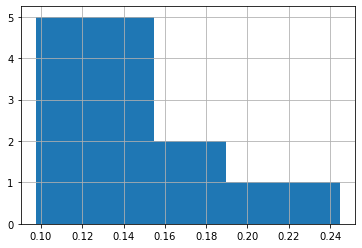

In [71]:
mergDep2.vgen_1.hist(bins=HT_bins)

In [72]:
class5 = q5, ei5,msd, ht, mb5, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

<AxesSubplot:ylabel='Classifier'>

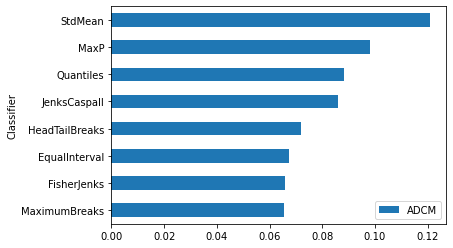

In [73]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [76]:
mergDep2['vgen1_ei5'] = ei5.yb
mergDep2['vgen1_fj5'] = fj5.yb
mergDep2['vgen1_jc5'] = jc5.yb

# we have:
mergDep2[['vgen1_ei5','vgen1_fj5','vgen1_jc5']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   vgen1_ei5  9 non-null      int32
 1   vgen1_fj5  9 non-null      int32
 2   vgen1_jc5  9 non-null      int32
dtypes: int32(3)
memory usage: 180.0 bytes


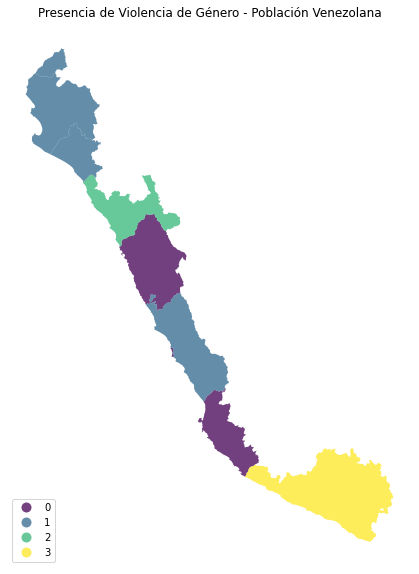

In [99]:
f, ax = plt.subplots(1, figsize=(10, 10))
mergDep2.plot(column='vgen1_ei5', 
        cmap='viridis', 
        categorical=True,
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

plt.title("Presencia de Violencia de Género - Población Venezolana")
ax.set_axis_off()
plt.savefig(os.path.join("images",'mapaDep_vgen1.jpg'))

In [50]:
#No intervals 
f, ax = plt.subplots(1, figsize=(10, 10))
mergDep2.plot(column='vgen_1', 
        cmap='viridis', 
        categorical=True,
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

Variable prost "Servicios Sexuales"

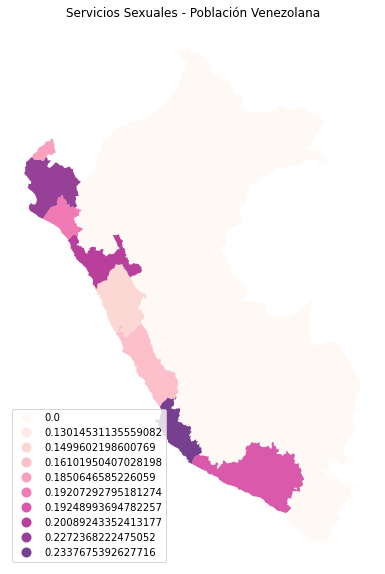

In [105]:
f, ax = plt.subplots(1, figsize=(10, 10))
mergDep1.plot(column='prost', 
        cmap='RdPu', 
        categorical=True,
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

plt.title("Servicios Sexuales - Población Venezolana")
ax.set_axis_off()

In [85]:
mergDep2['prost'].describe()

count    9.000000
mean     0.185850
std      0.034144
min      0.130145
25%      0.161020
50%      0.192073
75%      0.200892
max      0.233768
Name: prost, dtype: float64

<AxesSubplot:>

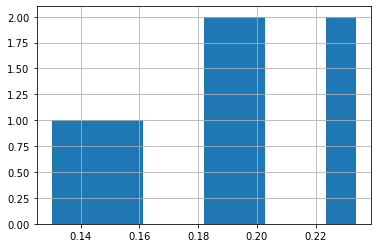

In [86]:
mergDep2.prost.hist()

In [87]:
np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=4
theVar_1=mergDep2.prost
# same interval width, easy interpretation
ei5_1 = mapclassify.EqualInterval(theVar_1, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd_1 = mapclassify.StdMean(theVar_1)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts                                
q5_1=mapclassify.Quantiles(theVar_1,k=K)

# based on similarity, good for multimodal data 
mb5_1 = mapclassify.MaximumBreaks(theVar_1, k=K)
# based on similarity, good for skewed data
ht_1 = mapclassify.HeadTailBreaks(theVar_1) # no K needed
# based on similarity, optimizer
fj5_1 = mapclassify.FisherJenks(theVar_1, k=K)
# based on similarity, optimizer
jc5_1 = mapclassify.JenksCaspall(theVar_1, k=K)
# based on similarity, optimizer
mp5_1 = mapclassify.MaxP(theVar_1, k=K) 

In [89]:
ht_1

HeadTailBreaks

  Interval     Count
--------------------
[0.13, 0.19] |     4
(0.19, 0.21] |     3
(0.21, 0.23] |     1
(0.23, 0.23] |     1

In [90]:
ht_1.yb

array([0, 1, 0, 3, 1, 1, 0, 2, 0])

In [91]:
np.unique(ht_1.yb,return_counts=True)

(array([0, 1, 2, 3]), array([4, 3, 1, 1], dtype=int64))

In [92]:
pd.Series(ht_1.yb).value_counts()

0    4
1    3
3    1
2    1
dtype: int64

In [93]:
ht_1.bins

array([0.18584992, 0.20929193, 0.23050219, 0.23376754], dtype=float32)

In [94]:
HT_bins=list(ht_1.bins)
HT_bins.insert(0,theVar_1.min())

<AxesSubplot:>

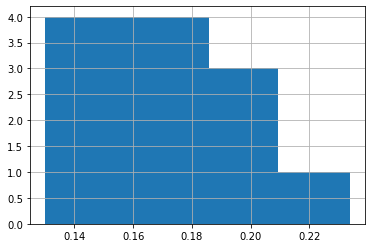

In [95]:
mergDep2.prost.hist(bins=HT_bins)

In [72]:
class5 = q5_1, ei5_1,msd_1, ht_1, mb5_1, fj5_1, jc5_1, mp5_1
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

<AxesSubplot:ylabel='Classifier'>

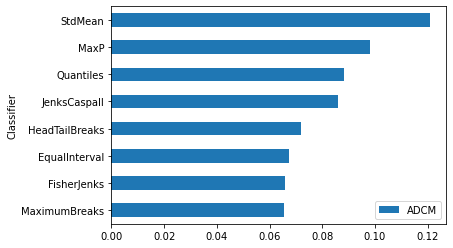

In [73]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [96]:
mergDep2['prost_ei5'] = ei5_1.yb
mergDep2['prost_fj5'] = fj5_1.yb
mergDep2['prost_jc5'] = jc5_1.yb

# we have:
mergDep2[['prost_ei5','prost_fj5','prost_jc5']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   prost_ei5  9 non-null      int32
 1   prost_fj5  9 non-null      int32
 2   prost_jc5  9 non-null      int32
dtypes: int32(3)
memory usage: 180.0 bytes


In [104]:
f, ax = plt.subplots(1, figsize=(10, 10))
mergDep2.plot(column='prost_ei5', 
        cmap='RdPu', 
        categorical=True,
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

plt.title("Presencia de Servicios Sexuales - Población Venezolana")
ax.set_axis_off()
plt.savefig(os.path.join("images",'mapaDep_prost.jpg'))

First dataframe replacing Nan with zeros

In [102]:
mergDep1['vgen_1'] = mergDep1['vgen_1'].replace(np.nan, 0)
mergDep1['vgen_2'] = mergDep1['vgen_2'].replace(np.nan, 0)
mergDep1['prost'] = mergDep1['prost'].replace(np.nan, 0)
mergDep1

OBJECTID CCDD        NOMBDEP  Shape_Leng  Shape_Area  \
0          1   01       AMAZONAS   12.912088    3.203006   
1          2   02         ANCASH   11.771520    2.954605   
2          3   03       APURIMAC    7.730154    1.765933   
3          4   04       AREQUIPA   17.429625    5.330203   
4          5   05       AYACUCHO   17.127166    3.643705   
5          6   06      CAJAMARCA   12.399239    2.684527   
6          7   07         CALLAO    1.131635    0.011740   
7          8   08          CUSCO   21.794434    6.000331   
8          9   09   HUANCAVELICA    9.561245    1.839851   
9         10   10        HUANUCO   14.589840    3.089811   
10        11   11            ICA   10.387016    1.767037   
11        12   12          JUNIN   14.314727    3.658881   
12        13   13    LA LIBERTAD   13.141385    2.068767   
13        14   14     LAMBAYEQUE    6.687039    1.184994   
14        15   15           LIMA   12.767353    2.904519   
15        16   16         LORETO   46.701789   30.550256   
16        17   17  MADRE DE DIOS   15.416397    7.023854   
17        18   18       MOQUEGUA    7.719946    1.334898   
18        19   19          PASCO   10.891698    1.972864   
19        20   20          PIURA   11.334192    2.899203   
20        21   21           PUNO   26.729499    5.666684   
21        22   22     SAN MARTIN   16.162954    4.174664   
22        23   23          TACNA    6.088704    1.362022   
23        24   24         TUMBES    3.787977    0.378757   
24        25   25        UCAYALI   27.470159    8.660111   

                                             geometry    vgen_1    vgen_2  \
0   POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...  0.000000  0.000000   
1   POLYGON ((-77.64697 -8.05086, -77.64689 -8.051...  0.097534  0.120207   
2   POLYGON ((-73.74655 -13.17442, -73.74570 -13.1...  0.000000  0.000000   
3   POLYGON ((-71.98109 -14.64062, -71.98093 -14.6...  0.244882  0.301743   
4   POLYGON ((-74.34843 -12.17503, -74.35000 -12.1...  0.000000  0.000000   
5   POLYGON ((-78.70034 -4.62769, -78.69817 -4.629...  0.000000  0.000000   
6   POLYGON ((-77.13504 -11.81820, -77.13484 -11.8...  0.120211  0.145258   
7   POLYGON ((-72.97280 -11.25189, -72.97134 -11.2...  0.000000  0.000000   
8   POLYGON ((-74.57118 -11.98710, -74.57095 -11.9...  0.000000  0.000000   
9   POLYGON ((-75.99200 -8.32108, -75.99015 -8.321...  0.000000  0.000000   
10  POLYGON ((-75.61136 -12.96649, -75.61103 -12.9...  0.131980  0.116530   
11  POLYGON ((-75.03564 -10.68232, -75.03436 -10.6...  0.000000  0.000000   
12  POLYGON ((-77.75753 -6.96579, -77.75638 -6.967...  0.197792  0.226585   
13  POLYGON ((-79.88373 -5.49283, -79.88265 -5.494...  0.141450  0.145194   
14  MULTIPOLYGON (((-76.78182 -12.40919, -76.78173...  0.155482  0.157804   
15  POLYGON ((-75.10004 -0.08096, -75.09485 -0.081...  0.000000  0.000000   
16  POLYGON ((-70.61346 -10.12964, -70.61359 -10.2...  0.000000  0.000000   
17  POLYGON ((-70.79388 -15.98721, -70.79486 -15.9...  0.000000  0.000000   
18  POLYGON ((-74.68005 -9.44727, -74.67872 -9.448...  0.000000  0.000000   
19  POLYGON ((-81.02621 -4.10594, -81.02557 -4.106...  0.161268  0.168477   
20  MULTIPOLYGON (((-68.86764 -13.01075, -68.86917...  0.000000  0.000000   
21  POLYGON ((-77.71678 -5.41597, -77.71270 -5.416...  0.000000  0.000000   
22  POLYGON ((-70.26604 -16.77955, -70.26474 -16.7...  0.000000  0.000000   
23  POLYGON ((-80.28521 -3.41276, -80.28406 -3.412...  0.142245  0.075704   
24  POLYGON ((-74.47145 -7.27617, -74.47052 -7.277...  0.000000  0.000000   

       prost  
0   0.000000  
1   0.149960  
2   0.000000  
3   0.192490  
4   0.000000  
5   0.000000  
6   0.130145  
7   0.000000  
8   0.000000  
9   0.000000  
10  0.233768  
11  0.000000  
12  0.200892  
13  0.192073  
14  0.161020  
15  0.000000  
16  0.000000  
17  0.000000  
18  0.000000  
19  0.227237  
20  0.000000  
21  0.000000  
22  0.000000  
23  0.185065  
24  0.000000

In [107]:
mergDep1['vgen_1'] = mergDep1['vgen_1'].round(2)
mergDep1['vgen_2'] = mergDep1['vgen_2'].round(2)
mergDep1['prost'] = mergDep1['prost'].round(2)
mergDep1

OBJECTID CCDD        NOMBDEP  Shape_Leng  Shape_Area  \
0          1   01       AMAZONAS   12.912088    3.203006   
1          2   02         ANCASH   11.771520    2.954605   
2          3   03       APURIMAC    7.730154    1.765933   
3          4   04       AREQUIPA   17.429625    5.330203   
4          5   05       AYACUCHO   17.127166    3.643705   
5          6   06      CAJAMARCA   12.399239    2.684527   
6          7   07         CALLAO    1.131635    0.011740   
7          8   08          CUSCO   21.794434    6.000331   
8          9   09   HUANCAVELICA    9.561245    1.839851   
9         10   10        HUANUCO   14.589840    3.089811   
10        11   11            ICA   10.387016    1.767037   
11        12   12          JUNIN   14.314727    3.658881   
12        13   13    LA LIBERTAD   13.141385    2.068767   
13        14   14     LAMBAYEQUE    6.687039    1.184994   
14        15   15           LIMA   12.767353    2.904519   
15        16   16         LORETO   46.701789   30.550256   
16        17   17  MADRE DE DIOS   15.416397    7.023854   
17        18   18       MOQUEGUA    7.719946    1.334898   
18        19   19          PASCO   10.891698    1.972864   
19        20   20          PIURA   11.334192    2.899203   
20        21   21           PUNO   26.729499    5.666684   
21        22   22     SAN MARTIN   16.162954    4.174664   
22        23   23          TACNA    6.088704    1.362022   
23        24   24         TUMBES    3.787977    0.378757   
24        25   25        UCAYALI   27.470159    8.660111   

                                             geometry  vgen_1  vgen_2  prost  
0   POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...    0.00    0.00   0.00  
1   POLYGON ((-77.64697 -8.05086, -77.64689 -8.051...    0.10    0.12   0.15  
2   POLYGON ((-73.74655 -13.17442, -73.74570 -13.1...    0.00    0.00   0.00  
3   POLYGON ((-71.98109 -14.64062, -71.98093 -14.6...    0.24    0.30   0.19  
4   POLYGON ((-74.34843 -12.17503, -74.35000 -12.1...    0.00    0.00   0.00  
5   POLYGON ((-78.70034 -4.62769, -78.69817 -4.629...    0.00    0.00   0.00  
6   POLYGON ((-77.13504 -11.81820, -77.13484 -11.8...    0.12    0.15   0.13  
7   POLYGON ((-72.97280 -11.25189, -72.97134 -11.2...    0.00    0.00   0.00  
8   POLYGON ((-74.57118 -11.98710, -74.57095 -11.9...    0.00    0.00   0.00  
9   POLYGON ((-75.99200 -8.32108, -75.99015 -8.321...    0.00    0.00   0.00  
10  POLYGON ((-75.61136 -12.96649, -75.61103 -12.9...    0.13    0.12   0.23  
11  POLYGON ((-75.03564 -10.68232, -75.03436 -10.6...    0.00    0.00   0.00  
12  POLYGON ((-77.75753 -6.96579, -77.75638 -6.967...    0.20    0.23   0.20  
13  POLYGON ((-79.88373 -5.49283, -79.88265 -5.494...    0.14    0.15   0.19  
14  MULTIPOLYGON (((-76.78182 -12.40919, -76.78173...    0.16    0.16   0.16  
15  POLYGON ((-75.10004 -0.08096, -75.09485 -0.081...    0.00    0.00   0.00  
16  POLYGON ((-70.61346 -10.12964, -70.61359 -10.2...    0.00    0.00   0.00  
17  POLYGON ((-70.79388 -15.98721, -70.79486 -15.9...    0.00    0.00   0.00  
18  POLYGON ((-74.68005 -9.44727, -74.67872 -9.448...    0.00    0.00   0.00  
19  POLYGON ((-81.02621 -4.10594, -81.02557 -4.106...    0.16    0.17   0.23  
20  MULTIPOLYGON (((-68.86764 -13.01075, -68.86917...    0.00    0.00   0.00  
21  POLYGON ((-77.71678 -5.41597, -77.71270 -5.416...    0.00    0.00   0.00  
22  POLYGON ((-70.26604 -16.77955, -70.26474 -16.7...    0.00    0.00   0.00  
23  POLYGON ((-80.28521 -3.41276, -80.28406 -3.412...    0.14    0.08   0.19  
24  POLYGON ((-74.47145 -7.27617, -74.47052 -7.277...    0.00    0.00   0.00

In [112]:
mergDep1

OBJECTID CCDD        NOMBDEP  Shape_Leng  Shape_Area  \
0          1   01       AMAZONAS   12.912088    3.203006   
1          2   02         ANCASH   11.771520    2.954605   
2          3   03       APURIMAC    7.730154    1.765933   
3          4   04       AREQUIPA   17.429625    5.330203   
4          5   05       AYACUCHO   17.127166    3.643705   
5          6   06      CAJAMARCA   12.399239    2.684527   
6          7   07         CALLAO    1.131635    0.011740   
7          8   08          CUSCO   21.794434    6.000331   
8          9   09   HUANCAVELICA    9.561245    1.839851   
9         10   10        HUANUCO   14.589840    3.089811   
10        11   11            ICA   10.387016    1.767037   
11        12   12          JUNIN   14.314727    3.658881   
12        13   13    LA LIBERTAD   13.141385    2.068767   
13        14   14     LAMBAYEQUE    6.687039    1.184994   
14        15   15           LIMA   12.767353    2.904519   
15        16   16         LORETO   46.701789   30.550256   
16        17   17  MADRE DE DIOS   15.416397    7.023854   
17        18   18       MOQUEGUA    7.719946    1.334898   
18        19   19          PASCO   10.891698    1.972864   
19        20   20          PIURA   11.334192    2.899203   
20        21   21           PUNO   26.729499    5.666684   
21        22   22     SAN MARTIN   16.162954    4.174664   
22        23   23          TACNA    6.088704    1.362022   
23        24   24         TUMBES    3.787977    0.378757   
24        25   25        UCAYALI   27.470159    8.660111   

                                             geometry  vgen_1  vgen_2  prost  
0   POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...    0.00    0.00   0.00  
1   POLYGON ((-77.64697 -8.05086, -77.64689 -8.051...    0.10    0.12   0.15  
2   POLYGON ((-73.74655 -13.17442, -73.74570 -13.1...    0.00    0.00   0.00  
3   POLYGON ((-71.98109 -14.64062, -71.98093 -14.6...    0.24    0.30   0.19  
4   POLYGON ((-74.34843 -12.17503, -74.35000 -12.1...    0.00    0.00   0.00  
5   POLYGON ((-78.70034 -4.62769, -78.69817 -4.629...    0.00    0.00   0.00  
6   POLYGON ((-77.13504 -11.81820, -77.13484 -11.8...    0.12    0.15   0.13  
7   POLYGON ((-72.97280 -11.25189, -72.97134 -11.2...    0.00    0.00   0.00  
8   POLYGON ((-74.57118 -11.98710, -74.57095 -11.9...    0.00    0.00   0.00  
9   POLYGON ((-75.99200 -8.32108, -75.99015 -8.321...    0.00    0.00   0.00  
10  POLYGON ((-75.61136 -12.96649, -75.61103 -12.9...    0.13    0.12   0.23  
11  POLYGON ((-75.03564 -10.68232, -75.03436 -10.6...    0.00    0.00   0.00  
12  POLYGON ((-77.75753 -6.96579, -77.75638 -6.967...    0.20    0.23   0.20  
13  POLYGON ((-79.88373 -5.49283, -79.88265 -5.494...    0.14    0.15   0.19  
14  MULTIPOLYGON (((-76.78182 -12.40919, -76.78173...    0.16    0.16   0.16  
15  POLYGON ((-75.10004 -0.08096, -75.09485 -0.081...    0.00    0.00   0.00  
16  POLYGON ((-70.61346 -10.12964, -70.61359 -10.2...    0.00    0.00   0.00  
17  POLYGON ((-70.79388 -15.98721, -70.79486 -15.9...    0.00    0.00   0.00  
18  POLYGON ((-74.68005 -9.44727, -74.67872 -9.448...    0.00    0.00   0.00  
19  POLYGON ((-81.02621 -4.10594, -81.02557 -4.106...    0.16    0.17   0.23  
20  MULTIPOLYGON (((-68.86764 -13.01075, -68.86917...    0.00    0.00   0.00  
21  POLYGON ((-77.71678 -5.41597, -77.71270 -5.416...    0.00    0.00   0.00  
22  POLYGON ((-70.26604 -16.77955, -70.26474 -16.7...    0.00    0.00   0.00  
23  POLYGON ((-80.28521 -3.41276, -80.28406 -3.412...    0.14    0.08   0.19  
24  POLYGON ((-74.47145 -7.27617, -74.47052 -7.277...    0.00    0.00   0.00

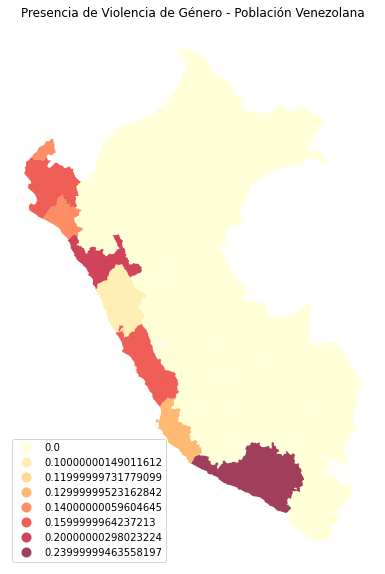

In [126]:
#No intervals 
f, ax = plt.subplots(1, figsize=(10, 10))
mergDep1.plot(column='vgen_1', 
        cmap='YlOrRd', 
        categorical=True,
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

plt.title("Presencia de Violencia de Género - Población Venezolana")
ax.set_axis_off()
plt.savefig(os.path.join("images",'mapaDep_VGen_NI.jpg'))

LIMA - DISTRITOS